add additional blocks & comments to make the notebook organized as you wish.
excited to have us back onto the project.
definitely watch the videos and resources I have sent in DISCORD for more info.
check for TASK ASSIGNMENTS on NOTION https://www.notion.so/Your-Starter-Package-bd5aa00df3cf4aadaa6385ef9578b3b2

message me discord / messenger / 647-769-0077 if you got any questions

Burrito & Crypto.
Dats a wrap. 
Haps holliday. ~ Andy Dec24th,2021

In [8]:
# 1.import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
# 2.import data
data = pd.read_csv("../Data/BTC-USD.csv") # yahoo finance data
data = data.sort_values("Date")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-25,32285.798828,34802.742188,32087.787109,32366.392578,32366.392578,5.989705e+10
1,2021-01-26,32358.613281,32794.550781,31030.265625,32569.849609,32569.849609,6.025542e+10
2,2021-01-27,32564.029297,32564.029297,29367.138672,30432.546875,30432.546875,6.257676e+10
3,2021-01-28,30441.041016,33858.312500,30023.207031,33466.097656,33466.097656,7.651716e+10
4,2021-01-29,34318.671875,38406.261719,32064.814453,34316.386719,34316.386719,1.178946e+11


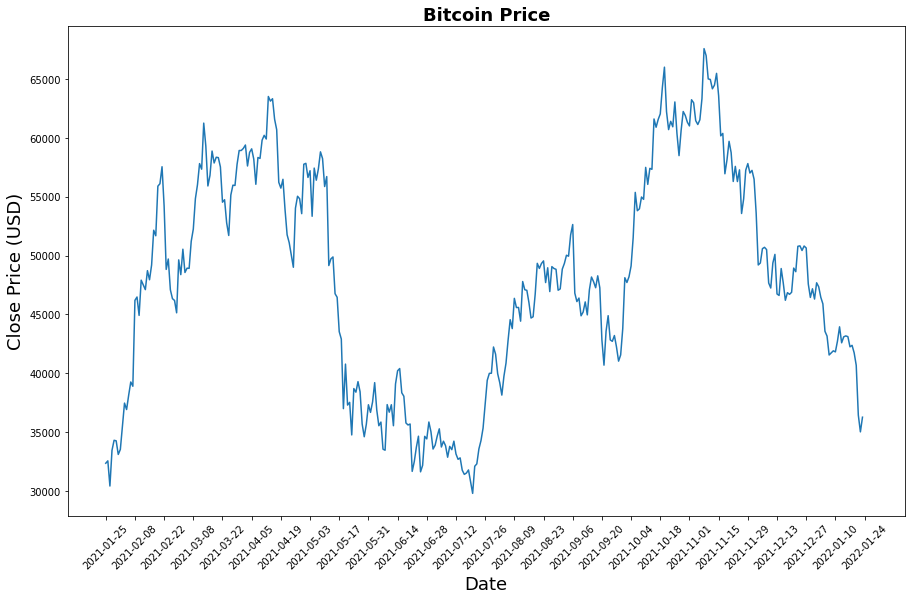

In [10]:
# 2.1 display data
price = data[["Close"]]
plt.figure(figsize=(15,9))
plt.plot(price)
plt.xticks(range(0, data.shape[0], 14), data["Date"].loc[::14], rotation=45)
plt.title("Bitcoin Price", fontsize=18, fontweight='bold')
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price (USD)", fontsize=18)
plt.show()

In [11]:
# 3.min max normalize
from sklearn.preprocessing import MinMaxScaler
# default adjusted between 0-10
min_max_scaler = MinMaxScaler((0,50))
history_data = min_max_scaler.fit_transform(price.values) # one model fits all??

history_data

array([[ 3.38861246],
       [ 3.65802431],
       [ 0.82787053],
       [ 4.84480977],
       [ 5.97073769],
       [ 5.9086827 ],
       [ 4.37904823],
       [ 4.93892935],
       [ 7.55166826],
       [10.1494275 ],
       [ 9.42639923],
       [11.03955991],
       [12.52488639],
       [12.04478139],
       [21.70198978],
       [22.07890258],
       [20.00932713],
       [23.97011843],
       [23.43451722],
       [22.90572825],
       [25.03999151],
       [24.0174265 ],
       [25.67901252],
       [29.58417314],
       [28.96285773],
       [34.53541314],
       [34.81532525],
       [36.72269495],
       [32.30973037],
       [25.18185882],
       [26.34832912],
       [22.89028304],
       [21.89173932],
       [21.6913809 ],
       [20.30009641],
       [26.25022151],
       [24.59202351],
       [27.4512444 ],
       [24.83326052],
       [25.31808806],
       [25.29832895],
       [28.33638531],
       [29.71330048],
       [33.12647476],
       [34.69486709],
       [37

In [12]:
# 4.split data into train, validate, test
# 4.consider "historal" & "future" data size (how long in the past you look at? how long in the future you try to predict)
def univariate_data(dataset, start, end, history_size, target_size):
    data = []
    labels = []
    start = start + history_size
    if end is None:
        end = len(dataset) - target_size
    
    for i in range(start, end):
        indices = range(i-history_size, i)
        data.append(np.reshape(dataset[indices], (history_size, 1)))
        labels.append(dataset[i+target_size])
    return np.array(data), np.array(labels)

past_history = 5
future_target = 0

TRAIN_SPLIT = int(len(history_data)*0.8)

x_train, y_train = univariate_data(history_data, 0, TRAIN_SPLIT, past_history, future_target)

x_test, y_test = univariate_data(history_data, TRAIN_SPLIT, None, past_history, future_target)



In [13]:
# 5.import keras, LSTM etc libraries
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD #SGD >> ADAM
from tensorflow.keras.layers import Dense, LSTM, LeakyReLU, Dropout

# 5.create and add LSTM layers
numunits = 64
learning_rate = 0.0001
activation_function = "sigmoid"
SGD = SGD(learning_rate=learning_rate)
loss_function= "mse"
batch_size = 5
num_epochs = 250

model = Sequential()
model.add(LSTM(units=numunits, activation=activation_function, input_shape=(None, 1)))
model.add(LeakyReLU(alpha=0.5))
model.add(Dropout(0.1))

model.add(Dense(units=1))
# 5.compile LSTM model
model.compile(optimizer=SGD, loss=loss_function)

In [14]:
# 6.display LSTM model summary

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 64)                16896     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 64)                0         
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________


Epoch 1/250
52/52 [==============================] - 0s 7ms/step - loss: 537.9520 - val_loss: 1539.8954
Epoch 2/250
52/52 [==============================] - 0s 3ms/step - loss: 383.5047 - val_loss: 1224.9608
Epoch 3/250
52/52 [==============================] - 0s 3ms/step - loss: 273.8008 - val_loss: 983.9102
Epoch 4/250
52/52 [==============================] - 0s 3ms/step - loss: 192.4739 - val_loss: 795.4078
Epoch 5/250
52/52 [==============================] - 0s 3ms/step - loss: 145.1855 - val_loss: 666.6735
Epoch 6/250
52/52 [==============================] - 0s 4ms/step - loss: 114.9357 - val_loss: 566.8125
Epoch 7/250
52/52 [==============================] - 0s 4ms/step - loss: 94.7693 - val_loss: 482.5571
Epoch 8/250
52/52 [==============================] - 0s 3ms/step - loss: 83.7449 - val_loss: 428.2204
Epoch 9/250
52/52 [==============================] - 0s 4ms/step - loss: 71.4433 - val_loss: 385.0367
Epoch 10/250
52/52 [==============================] - 0s 4ms/step - loss: 

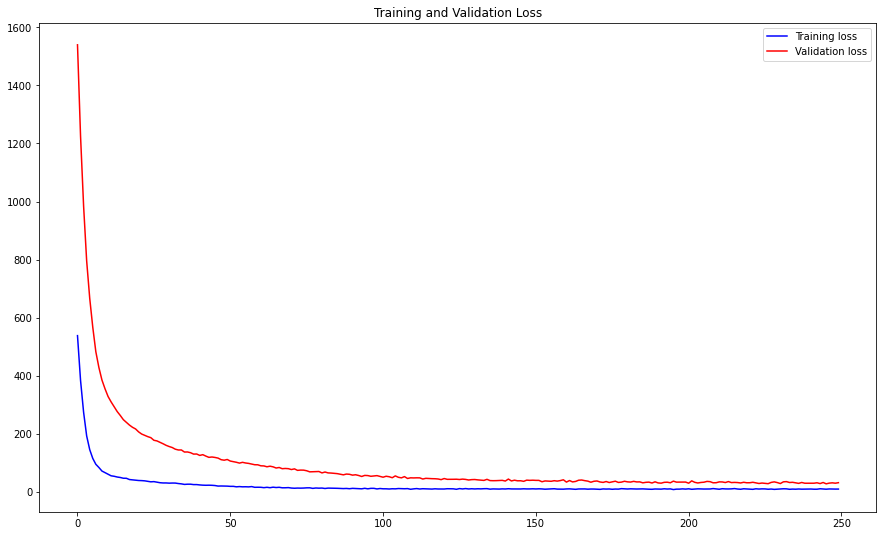

In [15]:
# 7.plot "training loss" & "validation loss"

history = model.fit(
    x_train,
    y_train,
    validation_split=0.1,
    batch_size=batch_size,
    epochs=num_epochs,
    shuffle=False
)

loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(len(loss))

plt.figure(figsize=(15,9))

plt.plot(epochs, loss, 'b', label="Training loss")
plt.plot(epochs, val_loss, 'r', label="Validation loss")
plt.title("Training and Validation Loss")
plt.legend()

plt.show()

In [18]:
# 8.1 predict ONE currency
test = pd.DataFrame(min_max_scaler.inverse_transform(y_test))
predict = pd.DataFrame(min_max_scaler.inverse_transform(model.predict(x_test)))

Text(0.5, 1.0, 'Bitcoin Price')

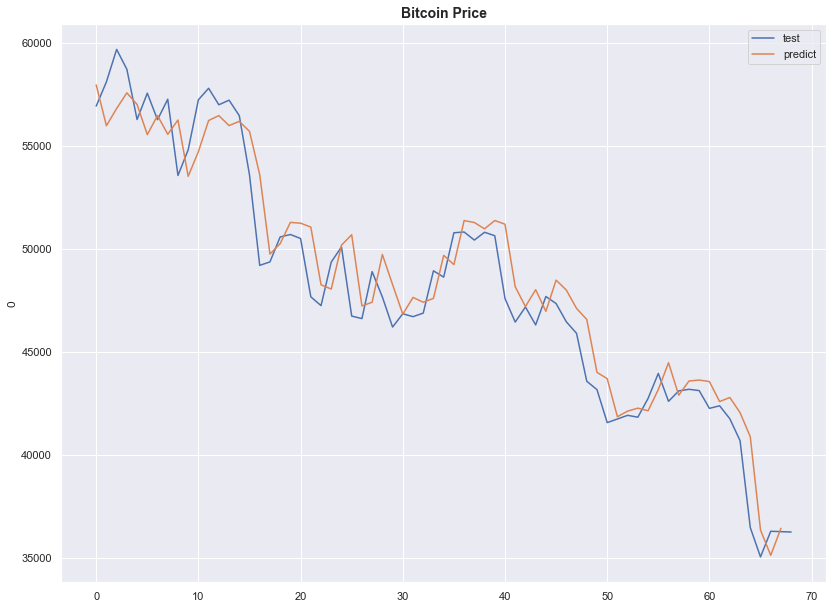

In [19]:
# 8.2 plot both ORIGINAL & PREDICTED data points
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7+2, 8.27+2)})

# test
bitcoin = sns.lineplot(x=test.index, y=test[0], label="test")
# predict
bitcoin = sns.lineplot(x=predict.index, y=predict[0], label="predict")

bitcoin.set_title('Bitcoin Price', size=14, fontweight='bold')

In [ ]:
# 9.1 repeat prediction model for other currencies

In [ ]:
# 9.2 repeat plots for other currencies